In [1]:
import numpy as np
import pandas as pd
from plotnine import *

from sklearn.linear_model import LinearRegression

# Set the seed for reproducibility
np.random.seed(42)

In [2]:
!pip show plotnine

Name: plotnine
Version: 0.15.0
Summary: A Grammar of Graphics for Python
Home-page: https://plotnine.readthedocs.io/en/stable
Author: 
Author-email: Hassan Kibirige <has2k1@gmail.com>
License: The MIT License (MIT)

Copyright (c) 2022 Hassan Kibirige

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND N

In [3]:
def generate_data(sigma):
    X = np.linspace(start=1, stop=10, num=10).reshape(-1, 1) #array w/ 1 column, the -1 means 'infer the # of rows'

    # Define parameters
    beta0 = 4
    beta1 = 3
    
    # Generate epsilon as a 1D array of N(0, sigma^2) RVs
    epsilon = sigma * np.random.randn(10)
    
    # Generate y using SLR model
    y = beta0 + beta1 * X.flatten() + epsilon

    return X, y 

In [4]:
def ss_decomp(X, y):

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Make predictions
    y_pred = model.predict(X)

    # Calculate the mean of y
    y_mean = np.mean(y)

    #calculate SS quantities
    SST = np.sum((y - y_mean) ** 2).round(4)
    SSR = np.sum((y_pred - y_mean) ** 2).round(4)
    SSE = np.sum((y - y_pred) ** 2).round(4)

    # Output the sum of squares decomposition
    print(f"SST (Total Sum of Squares): {SST}")
    print(f"SSR (Regression Sum of Squares): {SSR}")
    print(f"SSE (Error Sum of Squares): {SSE}")
    print(f"SST = SSR + SSE: {np.isclose(SST, SSR + SSE)}")
    
    print(f"Coefficient of Determination, R^2 is: {np.round(1-SSE/SST, 4)}")
    
    #make a ggplot
    df = pd.DataFrame({
        'X': X.flatten(),
        'y': y,
        'predicted': y_pred,
        'y_mean':  y_mean
    })

    gg1 = (
        ggplot(df, aes(x = 'X', y = 'y')) + 
        geom_point() + 
        #geom_smooth(method = "lm", formula = "y ~ x", se = False) +
        geom_hline(yintercept=y_mean, linetype='dashed') + 
        geom_segment(aes(xend = 'X', yend = 'y_mean'), color = "black") + #SST components
        ggtitle(f"R^2 is {np.round(1-SSE/SST, 4)}")
        )
    
    gg2 = (
        ggplot(df, aes(x = 'X', y = 'y')) + 
        geom_point() + 
        geom_smooth(method = "lm", formula = "y ~ x", se = False) +
        geom_hline(yintercept=y_mean, linetype='dashed') + 
        geom_segment(aes(xend = 'X', y = 'predicted', yend = 'y_mean'), color = "blue", linetype = "dashed") + #SSR components 
        geom_segment(aes(xend = 'X',  yend = 'predicted'), color = "red", linetype = "dashed") + #SSE components
        ggtitle(f"R^2 is {np.round(1-SSE/SST, 4)}")
        )

    display(gg1, gg2) #print the plots
    
    return gg1, gg2 #return the gg objects if you want to store the plots into variables

SST (Total Sum of Squares): 754.4873
SSR (Regression Sum of Squares): 735.6843
SSE (Error Sum of Squares): 18.803
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.9751


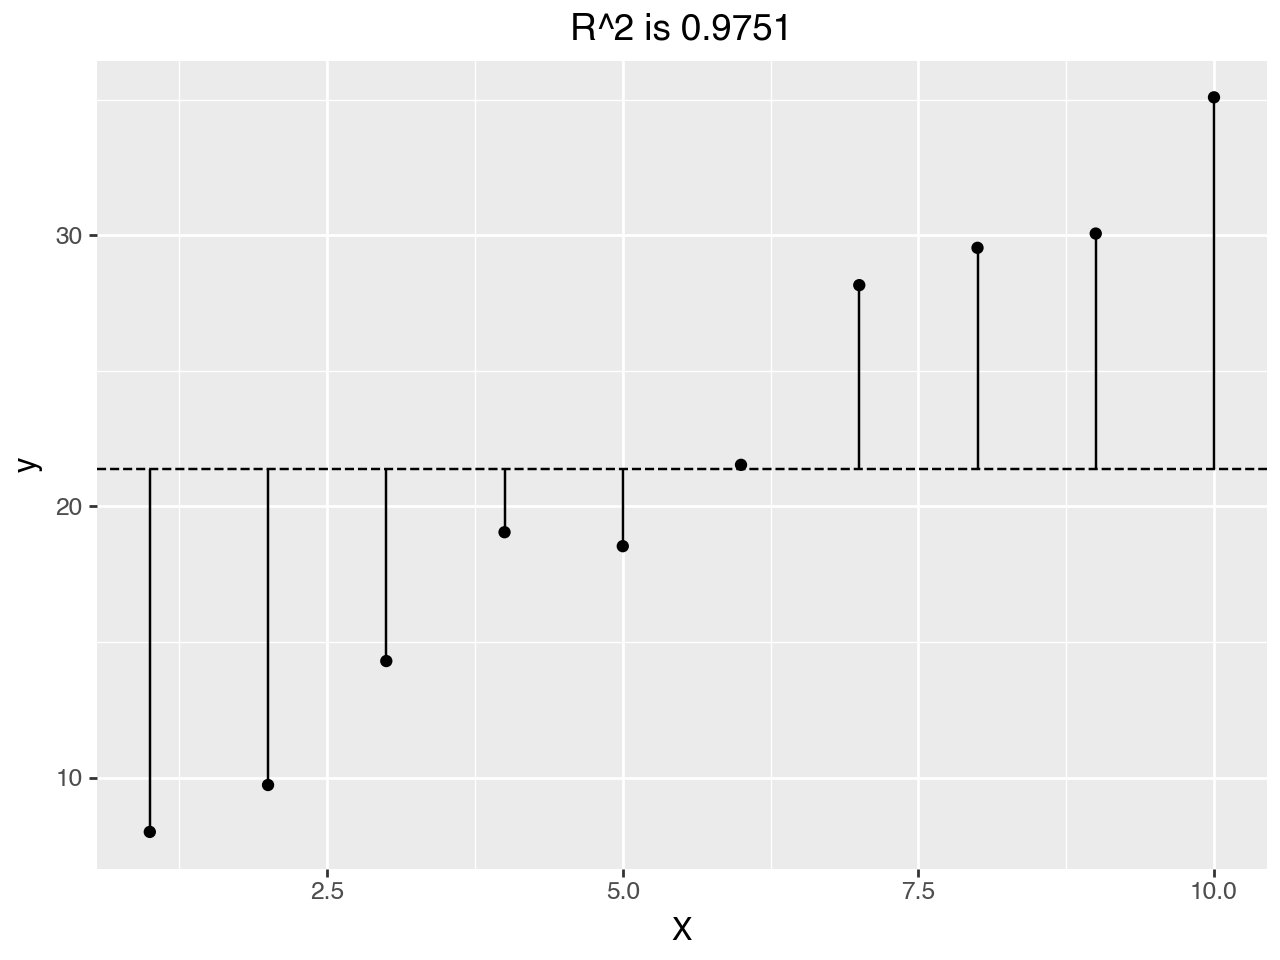

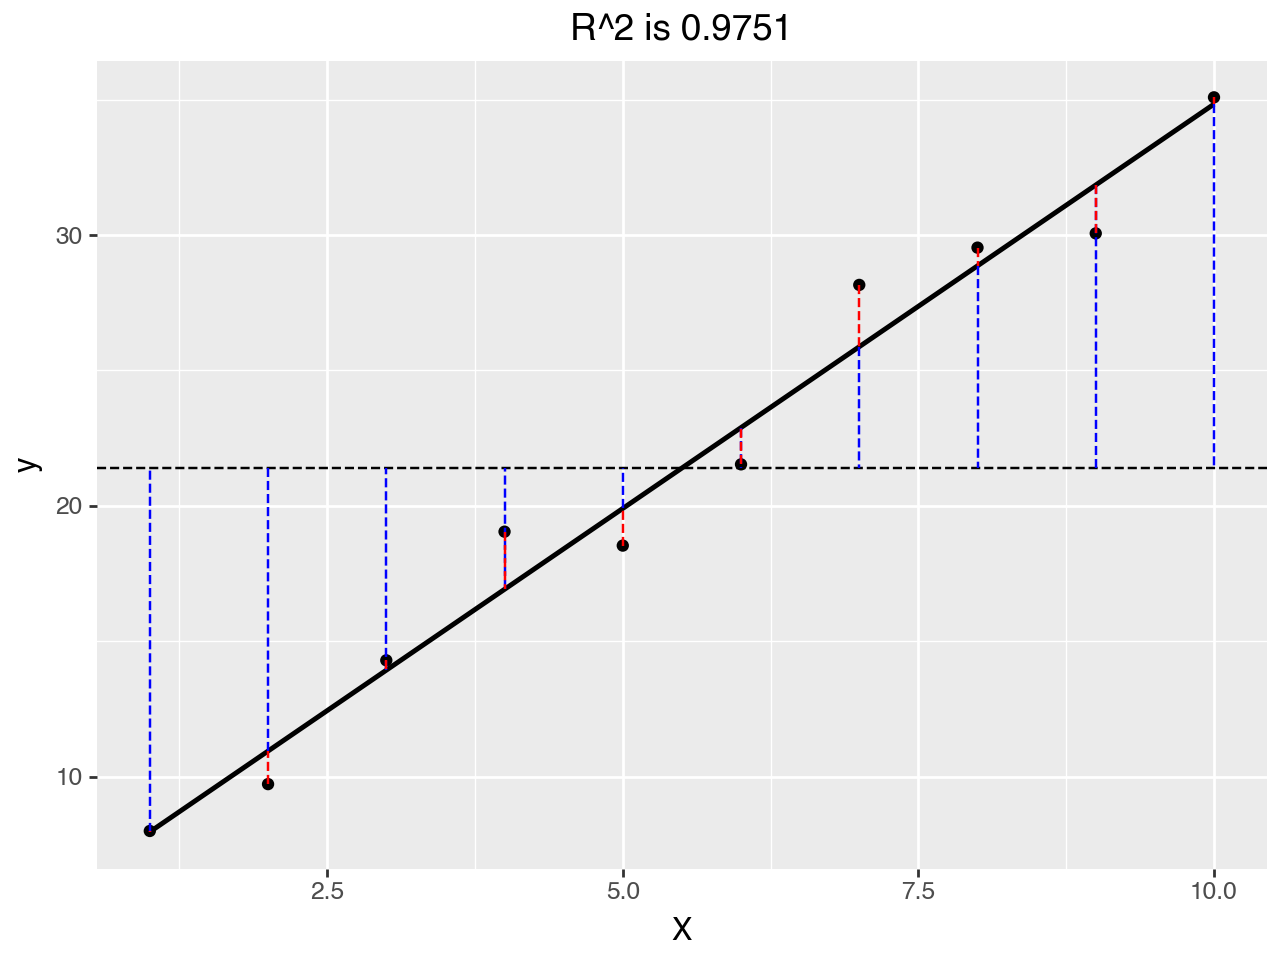

(<plotnine.ggplot.ggplot at 0x34008f950>,
 <plotnine.ggplot.ggplot at 0x3278fd9a0>)

In [5]:
X, y = generate_data(sigma = 2)
ss_decomp(X, y)


SST (Total Sum of Squares): 759.7065
SSR (Regression Sum of Squares): 635.5009
SSE (Error Sum of Squares): 124.2056
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.8365


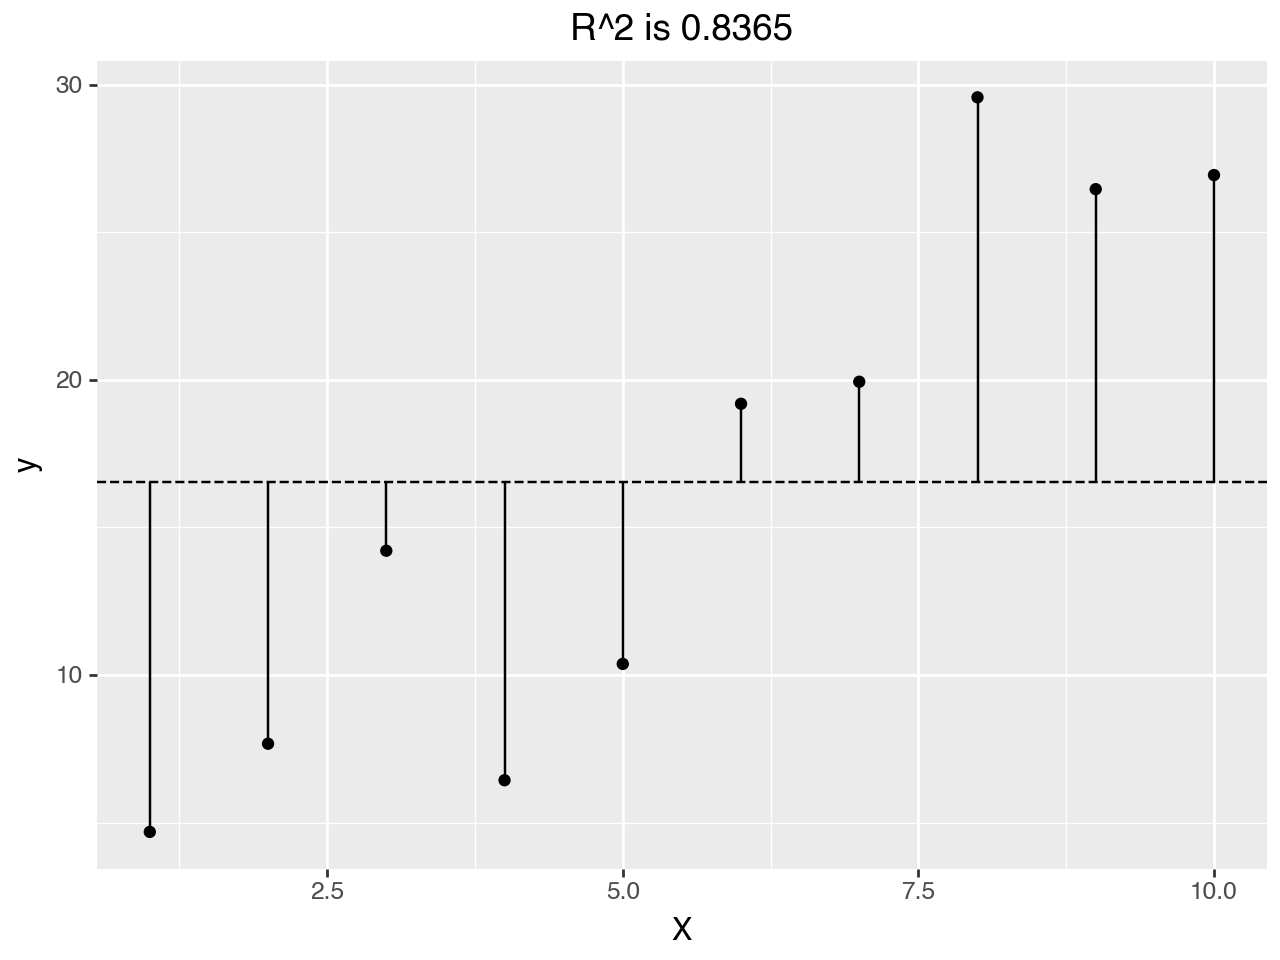

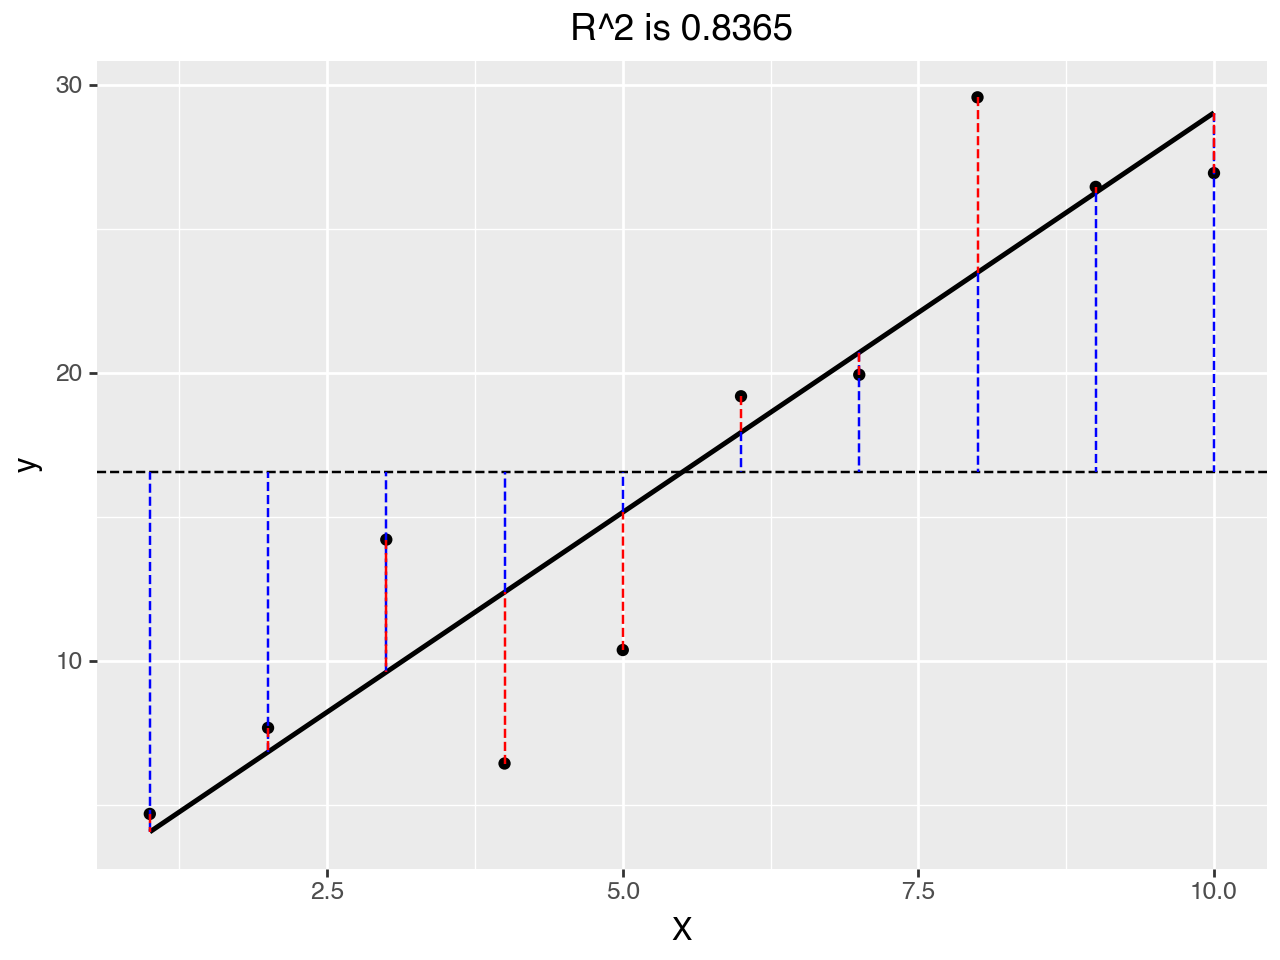

(<plotnine.ggplot.ggplot at 0x3410f7a00>,
 <plotnine.ggplot.ggplot at 0x3410f6750>)

In [6]:
X, y = generate_data(sigma = 5)
ss_decomp(X, y)

SST (Total Sum of Squares): 876.0056
SSR (Regression Sum of Squares): 351.8977
SSE (Error Sum of Squares): 524.108
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.4017


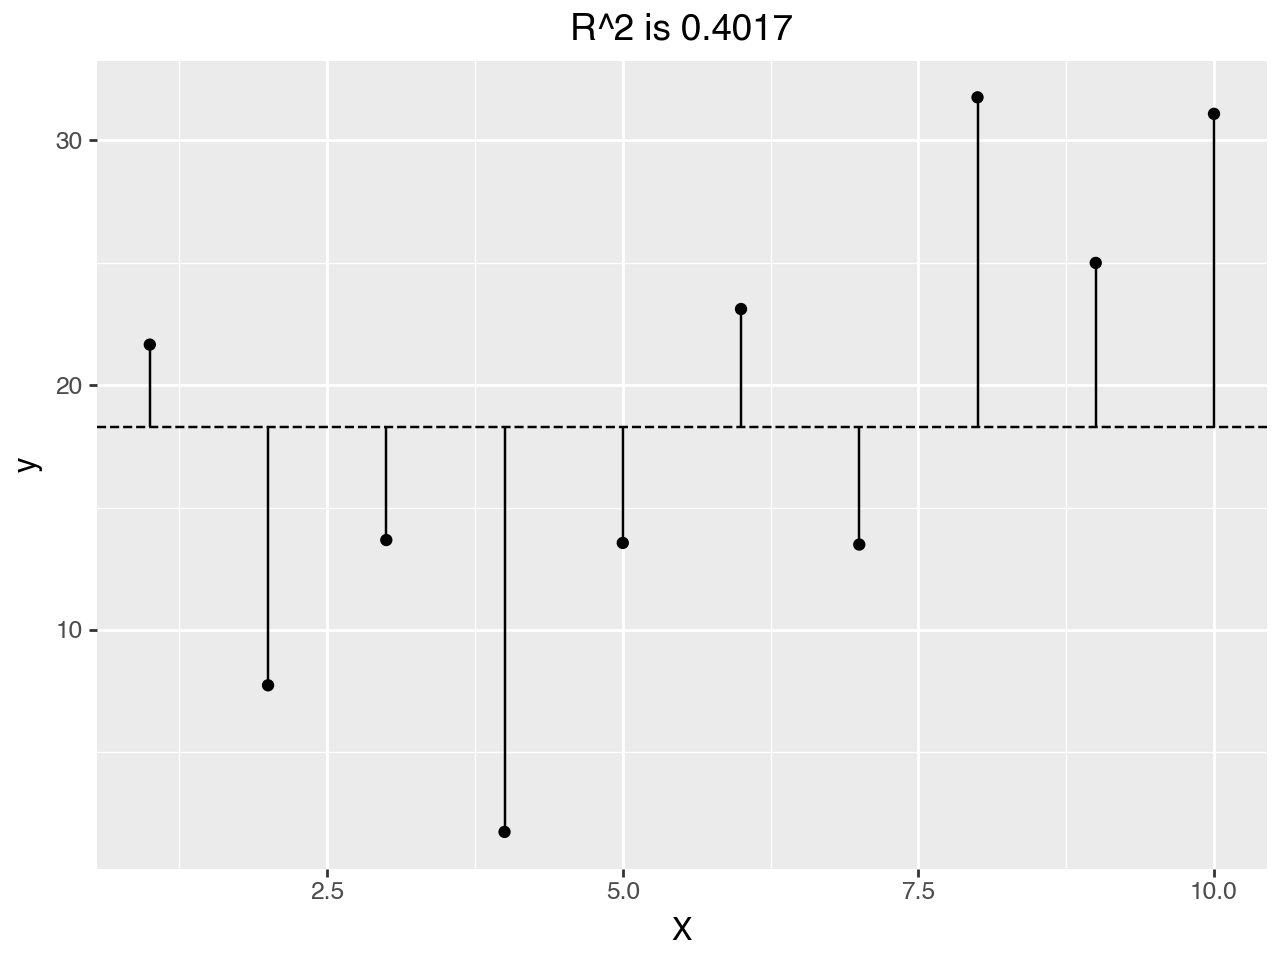

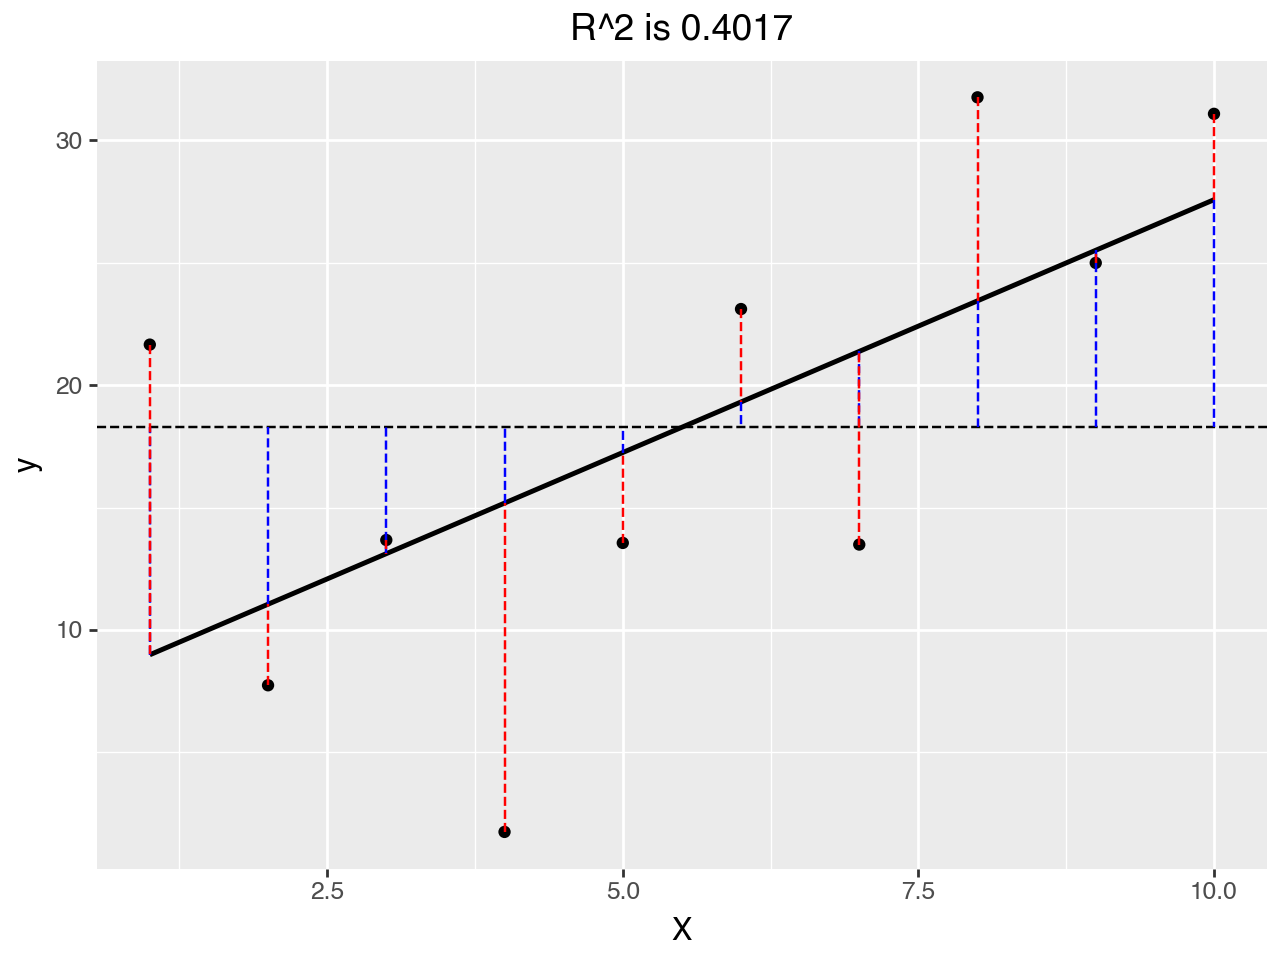

(<plotnine.ggplot.ggplot at 0x34276add0>,
 <plotnine.ggplot.ggplot at 0x34276a0d0>)

In [7]:
X, y = generate_data(sigma = 10)
ss_decomp(X, y)

SST (Total Sum of Squares): 111867.9128
SSR (Regression Sum of Squares): 9928.3091
SSE (Error Sum of Squares): 101939.6037
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.0888


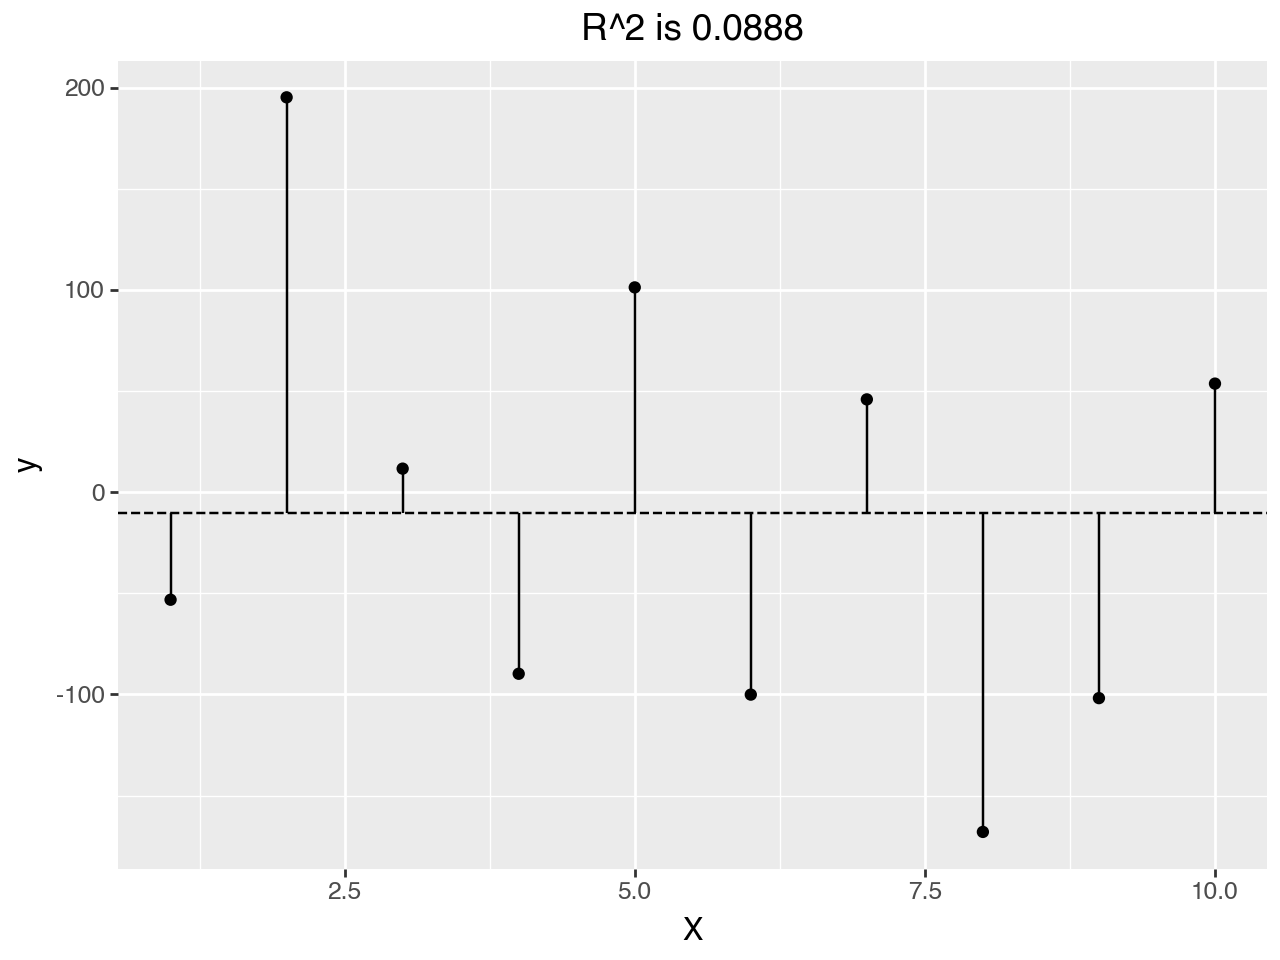

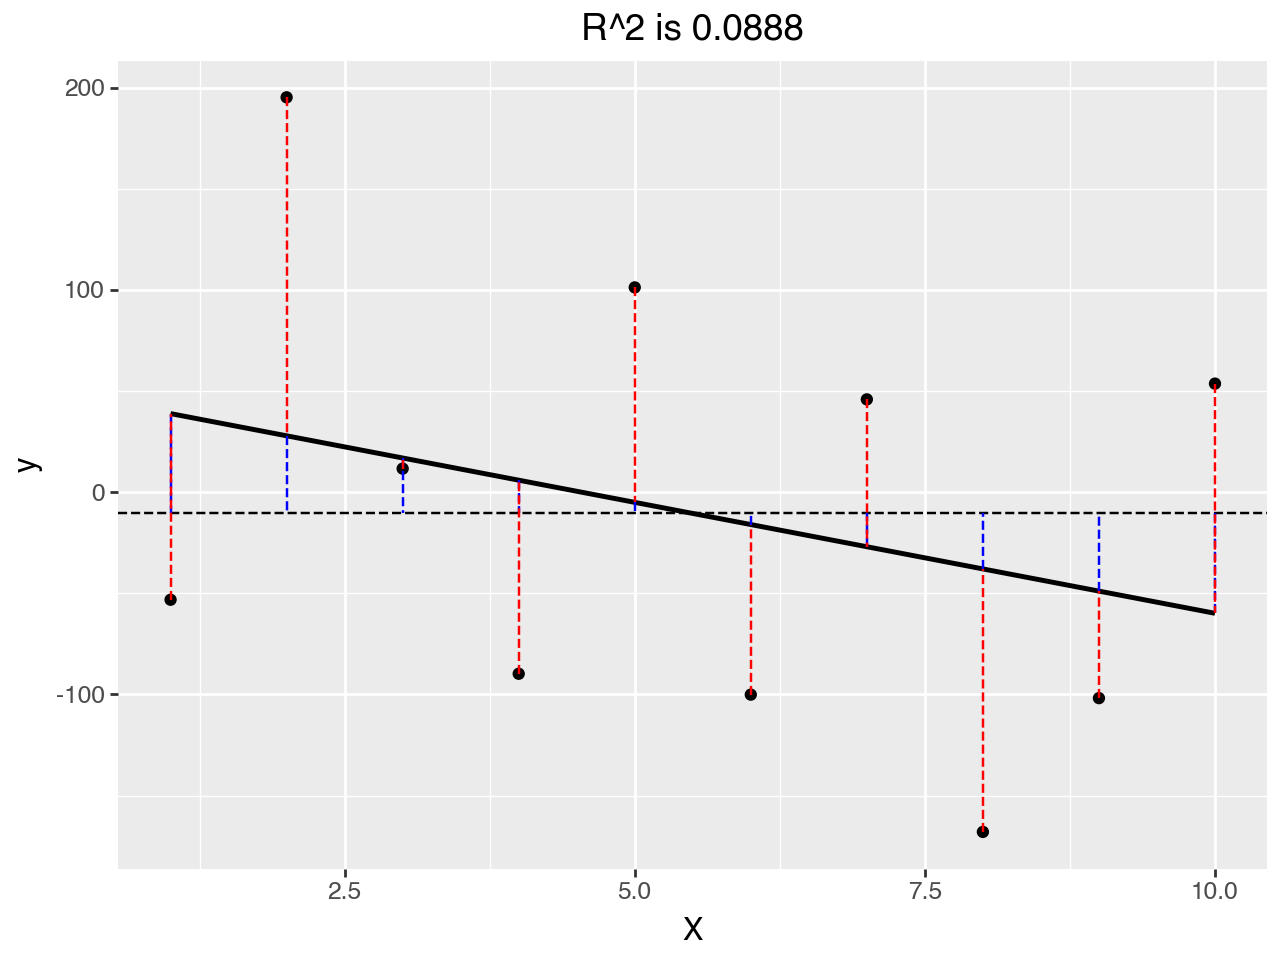

(<plotnine.ggplot.ggplot at 0x342778940>,
 <plotnine.ggplot.ggplot at 0x342778ef0>)

In [8]:
X, y = generate_data(sigma = 100)
ss_decomp(X, y)

## Exercises:

1. Modify the data generation function to take the slope, intercept, and sample size as arguments.
2. Modify the SS decomposition function to conduct the F-test for testing whether the true slope is zero or not.
4. Holding the intercept, sample size, and error variance constant, compare how different values of the slope affect:
   
    a.  the SS decomposition,\
    b. the plots,\
    c. the coefficient of determination, and\
    d. the hypothesis test results.\
   What do you find?
5. Holding the slope, sample size, and error variance constant, compare how different values of the intercept affect:\
    a.  the SS decomposition,\
    b. the plots,\
    c. the coefficient of determination, and\
    d. the hypothesis test results.\
   What do you find?
6. Holding the intercept, slope, and error variance constant, compare how different values of the sample size affect:\
    a.  the SS decomposition,\
    b. the plots,\
    c. the coefficient of determination, and\
    d. the hypothesis test results.\
   What do you find?
7. Write a function which calculates the t-statistic for testing whether the true slope is zero or not. For each simulation you run, calculate both the t-stat and the F-stat. Repeat this $B=$100 times, then plot the ordered pairs $\{(t_b, F_b)\}_{b=1}^B$ as a scatter plot. What relationship do you observe between them? Can you prove this relation?